In [1]:
import cv2

imagePath = 'ms.png'

In [2]:
#Read the img
img = cv2.imread(imagePath)

libpng warning: iCCP: known incorrect sRGB profile


In [4]:
img.shape

(1024, 1024, 3)

In [5]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
gray_image.shape

(1024, 1024)

In [7]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [8]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [9]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [10]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 1023.5, 1023.5, -0.5)

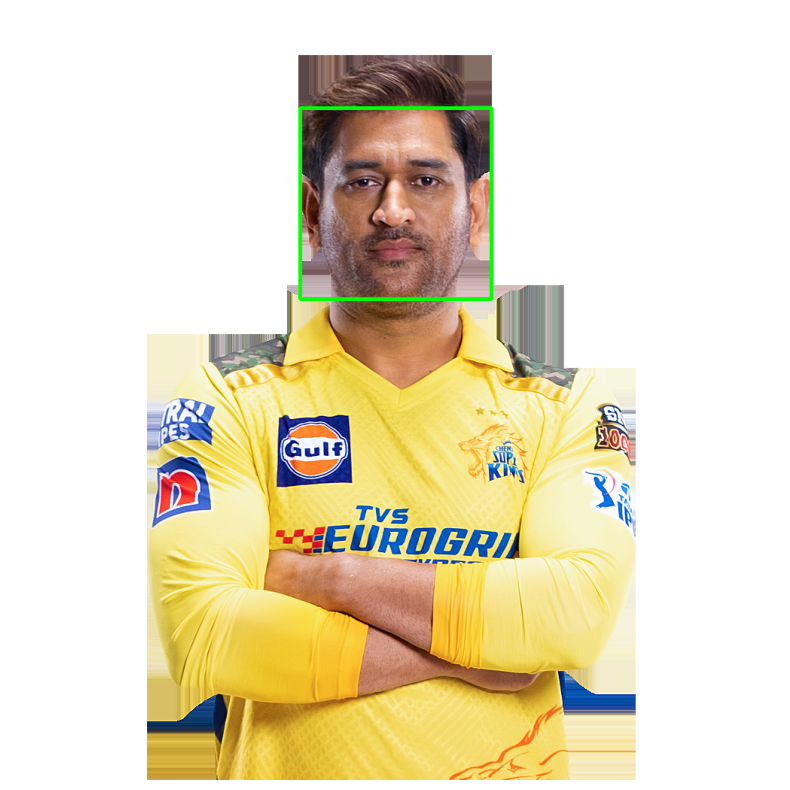

In [11]:
import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

Top Left Corner: (500, 259)
Top Right Corner: (560, 259)
Bottom Left Corner: (500, 319)
Bottom Right Corner: (560, 319)
Top Left Corner: (126, 362)
Top Right Corner: (468, 362)
Bottom Left Corner: (126, 704)
Bottom Right Corner: (468, 704)
Top Left Corner: (55, 962)
Top Right Corner: (115, 962)
Bottom Left Corner: (55, 1022)
Bottom Right Corner: (115, 1022)


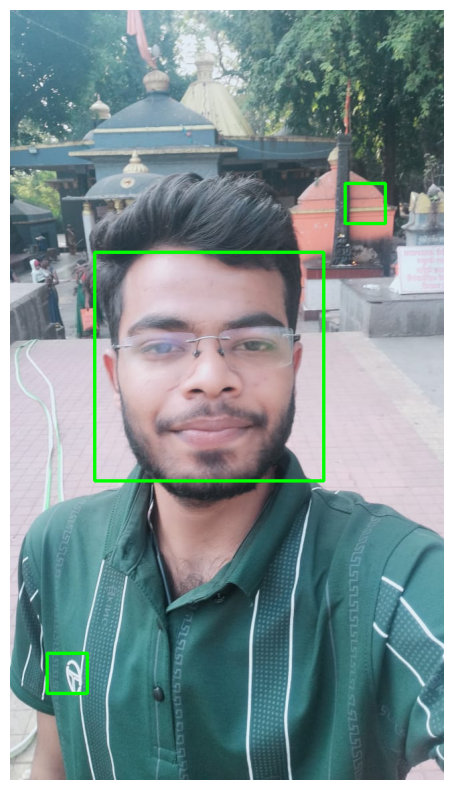

In [13]:
import cv2

imagePath = 'suyog.jpeg'

# Read the image
img = cv2.imread(imagePath)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

faces = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
    
    # Display the coordinates of the rectangle corners
    print(f'Top Left Corner: ({x}, {y})')
    print(f'Top Right Corner: ({x+w}, {y})')
    print(f'Bottom Left Corner: ({x}, {y+h})')
    print(f'Bottom Right Corner: ({x+w}, {y+h})')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


Top Left Corner: (161, 353)
Top Right Corner: (424, 353)
Bottom Left Corner: (161, 720)
Bottom Right Corner: (424, 720)


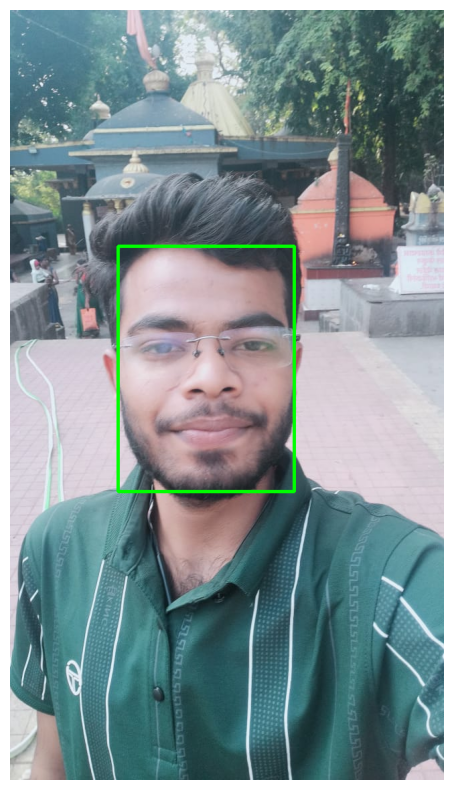

In [17]:
import cv2
import numpy as np
imagePath = 'suyog.jpeg'

# Read the image
img = cv2.imread(imagePath)

# Load the pre-trained deep learning face detection model
net = cv2.dnn.readNetFromCaffe(
    'deploy.prototxt', 'res10_300x300_ssd_iter_140000.caffemodel'
)

if net.empty():
    print("Error: Unable to load the deep learning face detection model.")
    exit()

# Convert the image to a blob
blob = cv2.dnn.blobFromImage(
    cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0)
)

# Set the input to the model
net.setInput(blob)

# Perform face detection
detections = net.forward()

# Loop over the detections
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    # Filter out weak detections
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([img.shape[1], img.shape[0], img.shape[1], img.shape[0]])
        (startX, startY, endX, endY) = box.astype("int")

        # Draw the face rectangle
        cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 4)

        # Display the coordinates of the rectangle corners
        print(f'Top Left Corner: ({startX}, {startY})')
        print(f'Top Right Corner: ({endX}, {startY})')
        print(f'Bottom Left Corner: ({startX}, {endY})')
        print(f'Bottom Right Corner: ({endX}, {endY})')

# Display the result
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
